# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr'):
    # Extract all cells within each row
    cells = row.find_all(['td', 'tr'])

    # Skip the header row
    if not cells:
        continue

    # Create a dictionary for each row using header names
    row_data = {
        'id': cells[0].text.strip(),
        'terrestrial_date': cells[1].text.strip(),
        'sol': cells[2].text.strip(),
        'ls': cells[3].text.strip(),
        'month': cells[4].text.strip(),
        'min_temp': cells[5].text.strip(),
        'pressure': cells[6].text.strip()
    }

    table_data.append(row_data)

In [7]:
# Create a Pandas DataFrame
weather_df = pd.DataFrame(table_data)

In [8]:
# Confirm DataFrame was created successfully
# Display the DataFrame
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
weather_df['id'] = weather_df['id'].astype(int)
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol'] = weather_df['sol'].astype(int)
weather_df['ls'] = weather_df['ls'].astype(float)
weather_df['month'] = weather_df['month'].astype(int)
weather_df['min_temp'] = weather_df['min_temp'].astype(float)
weather_df['pressure'] = weather_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
month_counts = weather_df['month'].value_counts().sort_index()

print(f'The number of days for each month on Mars is:\n{month_counts}')

The number of days for each month on Mars is:
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?
num_sols = weather_df['sol'].nunique()
print(f"There are {num_sols} days on Mars.")

There are 1867 days on Mars.


In [14]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = weather_df.groupby('month')['min_temp'].mean()

# Print the result
print(average_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


<Axes: title={'center': 'Average Low Temperature on Mars'}, xlabel='Month', ylabel='Temperature in Celsius'>

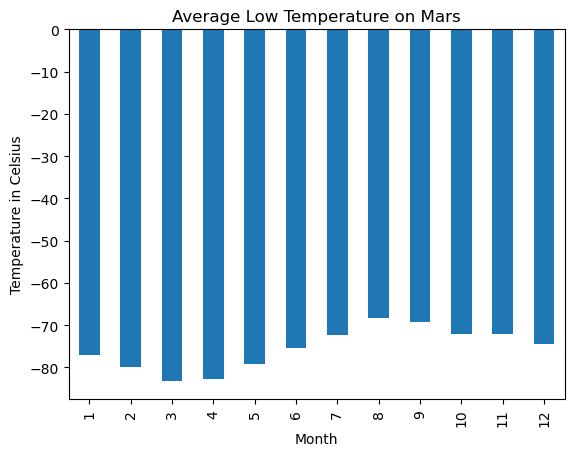

In [15]:
# Plot the average temperature by month
average_low_temp_by_month.plot(kind='bar', xlabel='Month', ylabel='Temperature in Celsius', title='Average Low Temperature on Mars')

In [16]:
# Identify the coldest and hottest months in Curiosity's location
average_low_temp_by_month2 = weather_df.groupby('month')['min_temp'].mean().sort_values()

# Print the result
print(average_low_temp_by_month2)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


<Axes: title={'center': 'Average Low Temperature on Mars in Order of Month'}, xlabel='Month', ylabel='Temperature in Celsius'>

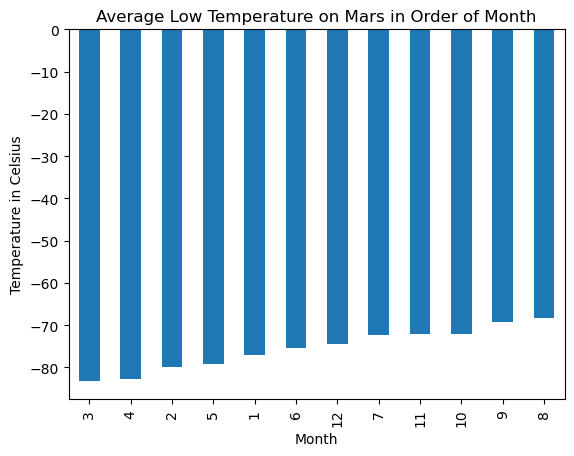

In [17]:
average_low_temp_by_month2.plot(kind='bar', xlabel='Month', ylabel='Temperature in Celsius', title='Average Low Temperature on Mars in Order of Month')

In [18]:
# 4. Average pressure by Martian month
average_pressure_by_month = weather_df.groupby('month')['pressure'].mean().sort_values()

# Print the result
print(average_pressure_by_month)

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


<Axes: title={'center': 'Average Pressure on Mars'}, xlabel='Month', ylabel='Atmospheric Pressure'>

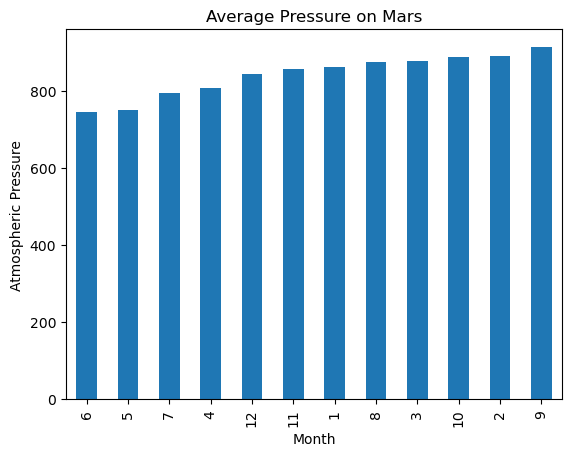

In [19]:
# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar', xlabel='Month', ylabel='Atmospheric Pressure', title='Average Pressure on Mars')

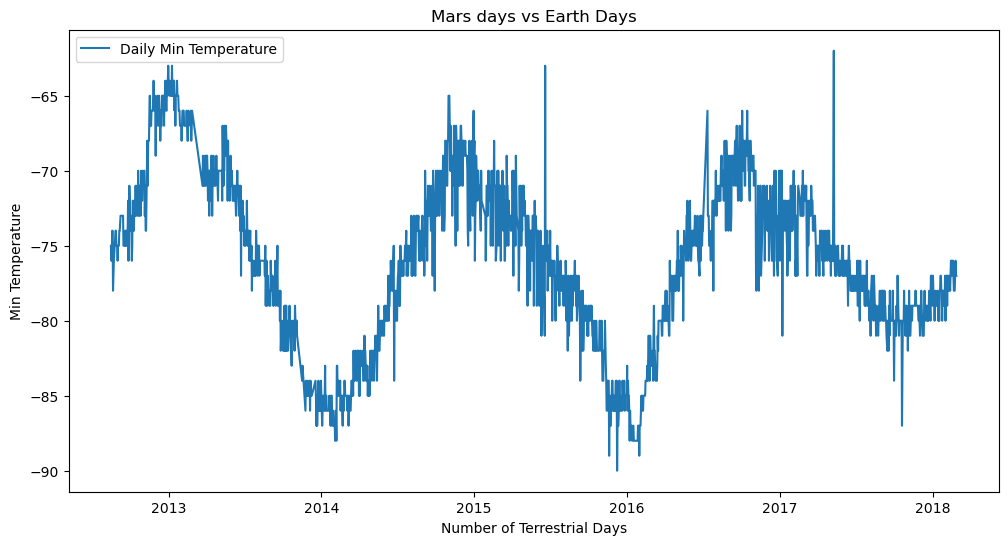

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
date_min_temp = weather_df[['terrestrial_date', 'min_temp']]

# Plot the daily minimum temperature
plt.figure(figsize=(12, 6))
plt.plot(date_min_temp['terrestrial_date'], date_min_temp['min_temp'], label='Daily Min Temperature')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Min Temperature')
plt.title('Mars days vs Earth Days')
plt.legend()
plt.show()

In [21]:
# Trying to get Earth Days per Mars Year in a different way. Here I am getting min and max Earth dates in the dataset.
min_terrestrial_date = weather_df['terrestrial_date'].min()
max_terrestrial_date = weather_df['terrestrial_date'].max()

print(f'Minimum Terrestrial Date: {min_terrestrial_date}')
print(f'Maximum Terrestrial Date: {max_terrestrial_date}')

Minimum Terrestrial Date: 2012-08-16 00:00:00
Maximum Terrestrial Date: 2018-02-27 00:00:00


In [22]:
# Trying to get Earth Days per Mars Year in a different way. Here I am getting the amonut of Earth years in the dataset.
min_terrestrial_date = weather_df['terrestrial_date'].min()
max_terrestrial_date = weather_df['terrestrial_date'].max()

# Calculate the number of days between the two dates
days_between_dates = (max_terrestrial_date - min_terrestrial_date).days

earth_years = days_between_dates / 365

earth_years

5.536986301369863

In [23]:
# Trying to get Earth Days per Mars Year in a different way. Here I am getting the amount of Mars years in the dataset.
mars_years = days_between_dates / 687
mars_years

2.9417758369723437

In [24]:
# Trying to get Earth Days per Mars Year in a different way. Here I am getting the amount of Earth years per Mars year.
mars_earth_year = earth_years / mars_years
mars_earth_year

1.8821917808219177

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
weather_df.to_csv('mars_weather_data.csv', index=False)

In [26]:
browser.quit()